## Quantifying model fit

#### Coefficient of determination
The coefficient of determination is a measure of how well the linear regression line fits the observed values. For simple linear regression, it is equal to the square of the correlation between the explanatory and response variables.

Here, you'll take another look at the second stage of the advertising pipeline: modeling the click response to impressions. Two models are available: mdl_click_vs_impression_orig models n_clicks versus n_impressions. mdl_click_vs_impression_trans is the transformed model you saw in Chapter 2. It models n_clicks to the power of 0.25 versus n_impressions to the power of 0.25.

In [5]:
import pandas as pd
from statsmodels.formula.api import ols

ad_conversion = pd.read_csv("ad_conversion.csv")

mdl_click_vs_impression_orig = ols("n_clicks ~ n_impressions", ad_conversion).fit()

# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"]**0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"]**0.25

# Run a linear regression of your transformed variables
mdl_click_vs_impression_trans = ols("qdrt_n_clicks ~ qdrt_n_impressions", ad_conversion).fit()

# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())

# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:09:01   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [6]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


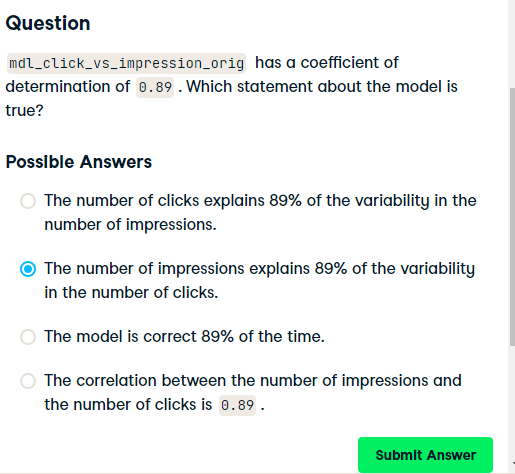

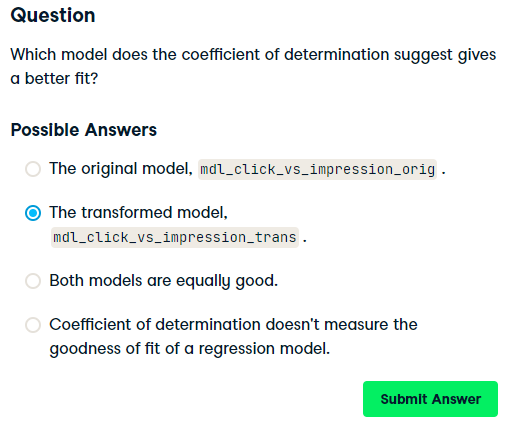

#### Residual standard error
Residual standard error (RSE) is a measure of the typical size of the residuals. Equivalently, it's a measure of how wrong you can expect predictions to be. Smaller numbers are better, with zero being a perfect fit to the data.

Again, you'll look at the models from the advertising pipeline, mdl_click_vs_impression_orig and mdl_click_vs_impression_trans.

In [7]:
import numpy as np

# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875722


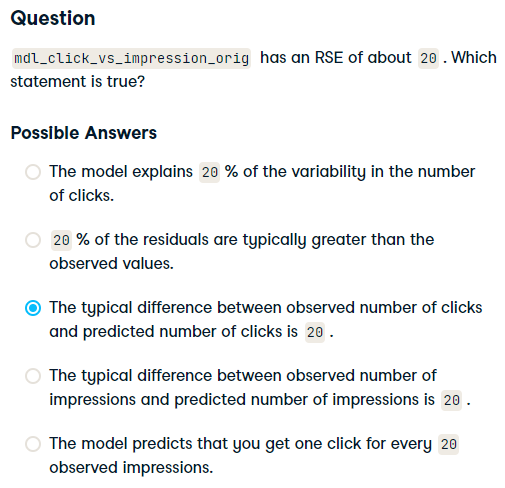

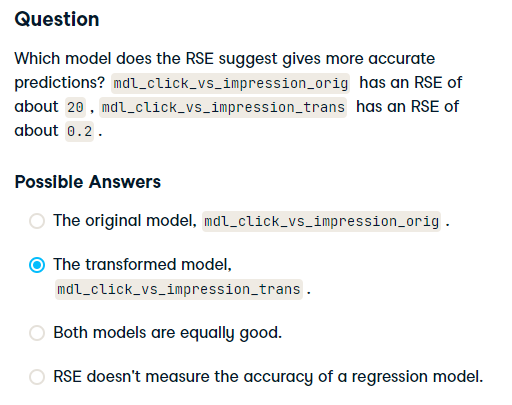

Rapid RSE wrangling! <strong>RSE is a measure of accuracy for regression models.</strong> It even works on other other statistical model types like regression trees, so you can compare accuracy across different classes of models.

## Visualizing model fit

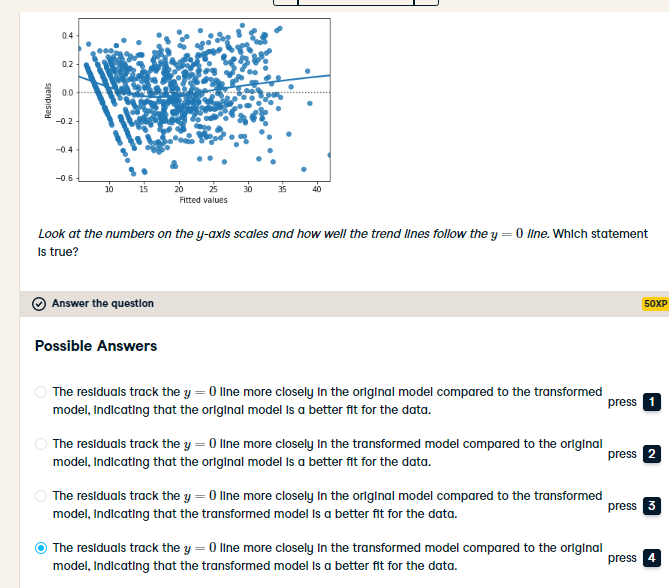

Dapper diagnosis! In a good model, the residuals should have a trend line close to zero.

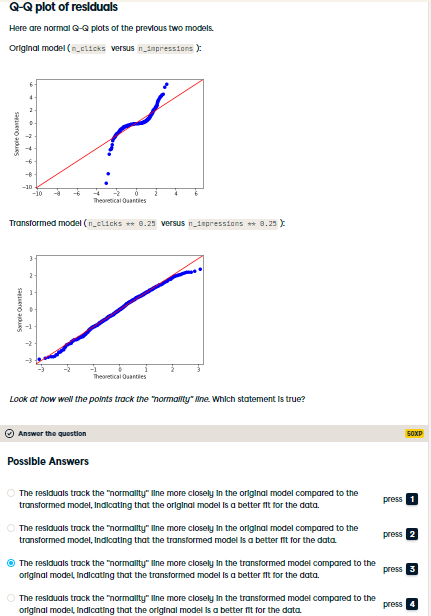

You have Q-Q juju! If the residuals from the model are normally distributed, then the points will track the line on the Q-Q plot. In this case, neither model is perfect, but the transformed model is closer.

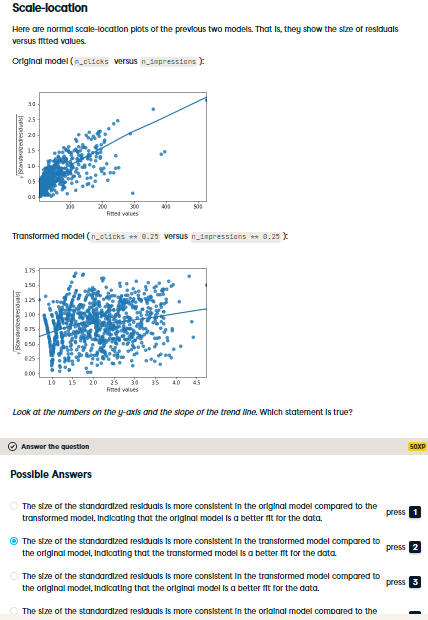

Skillful scale-location analysis! In a good model, the size of the residuals shouldn't change much as the fitted values change.

#### Drawing diagnostic plots
It's time for you to draw these diagnostic plots yourself using the Taiwan real estate dataset and the model of house prices versus number of convenience stores.

taiwan_real_estate is available as a pandas DataFrame and mdl_price_vs_conv is available.

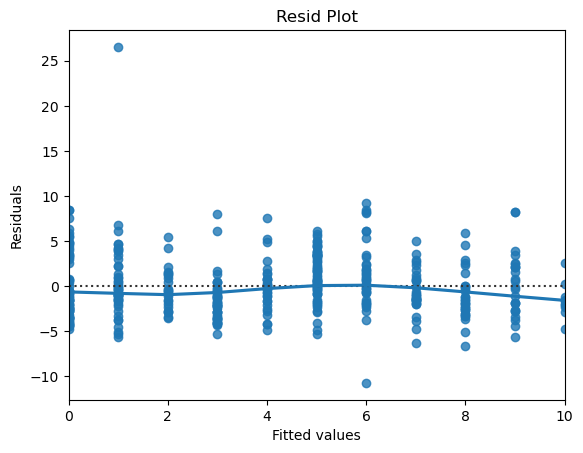

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import relavant dataset
taiwan_real_estate = pd.read_csv("taiwan_real_estate2.csv")

# Plot the residuals vs. fitted values
sns.residplot(x="n_convenience", y="price_twd_msq", data=taiwan_real_estate, lowess = True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Resid Plot")

# Show the plot
plt.show()

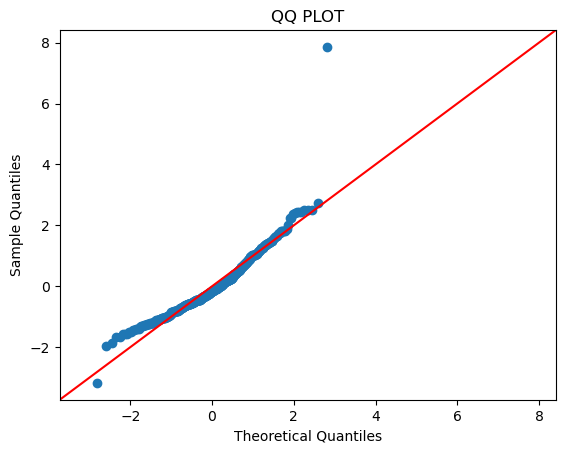

In [14]:
# Import qqplot
from statsmodels.api import qqplot
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit()

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

plt.title("QQ PLOT")

# Show the plot
plt.show()

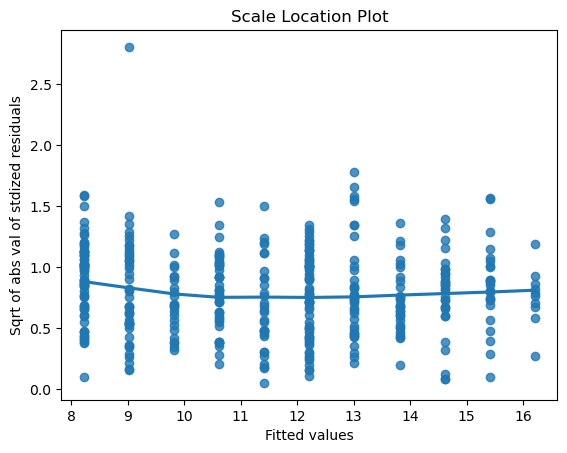

In [10]:
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")
plt.title("Scale Location Plot")

# Show the plot
plt.show()

Perfect plotting! These three diagnostic plots are excellent for sanity-checking the quality of your models.

## Outliers, leverage, and influence

#### Leverage
Leverage measures how unusual or extreme the explanatory variables are for each observation. Very roughly, high leverage means that the explanatory variable has values that are different from other points in the dataset. In the case of simple linear regression, where there is only one explanatory value, this typically means values with a very high or very low explanatory value.

Here, you'll look at highly leveraged values in the model of house price versus the square root of distance from the nearest MRT station in the Taiwan real estate dataset.

Guess which observations you think will have a high leverage, then move the slider to find out.



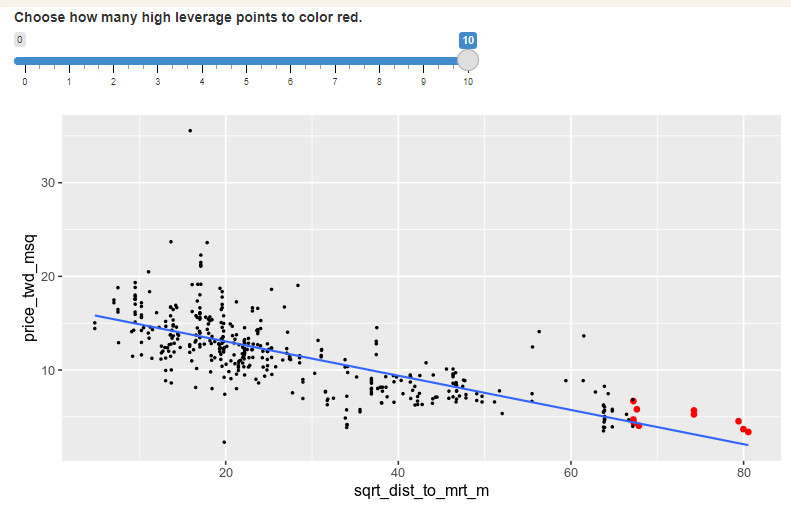

<strong>Question: Which statement is true?</strong><br><br>
a.Observations with a large distance to the nearest MRT station have the highest leverage, because these points are furthest away from the linear regression trend line.<br>

b.Observations with a large distance to the nearest MRT station have the highest leverage, because leverage is proportional to the explanatory variable.<br>

<strong>c.Observations with a large distance to the nearest MRT station have the highest leverage, because most of the observations have a short distance, so long distances are more extreme.</strong><br>

d.Observations with a high price have the highest leverage, because most of the observations have a low price, so high prices are most extreme.

Lovely leveraging! Highly leveraged points are the ones with explanatory variables that are furthest away from the others.

#### Influence
Influence measures how much a model would change if each observation was left out of the model calculations, one at a time. That is, it measures how different the prediction line would look if you would run a linear regression on all data points except that point, compared to running a linear regression on the whole dataset.

The standard metric for influence is Cook's distance, which calculates influence based on the residual size and the leverage of the point.

You can see the same model as last time: house price versus the square root of distance from the nearest MRT station in the Taiwan real estate dataset.

Guess which observations you think will have a high influence, then move the slider to find out.



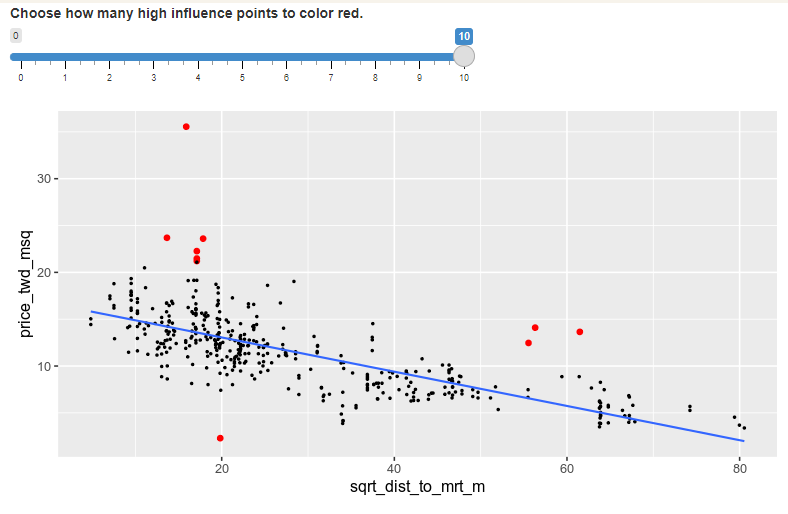

<strong>Question: Which statement is true?</strong>

<strong>a.Observations far away from the trend line have high influence, because they have large residuals and are far away from other observations.</strong><br>

b.Observations with high prices have high influence, because influence is proportional to the response variable.<br>

c.Observations far away from the trend line have high influence, because the slope of the trend is negative.<br>

d.Observations far away from the trend line have high influence, because that increases the leverage of those points.

Impressive influence interpretation! The majority of the influential houses were those with prices that were much higher than the model predicted (and one with a price that was much lower).

#### Extracting leverage and influence
In the last few exercises, you explored which observations had the highest leverage and influence. Now you'll extract those values from the model.

mdl_price_vs_dist and taiwan_real_estate are available.

In [11]:
import pandas as pd
from statsmodels.formula.api import ols

mdl_price_vs_dist = ols("price_twd_msq ~ dist_to_mrt_m", taiwan_real_estate).fit()

In [12]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Sort taiwan_real_estate by leverage in descending order and print the head
print(taiwan_real_estate.sort_values(by = "leverage", ascending = False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  leverage
347       6488.021              1        15 to 30       3.388805  0.046808
116       6396.283              1        30 to 45       3.691377  0.045313
249       6306.153              1        15 to 30       4.538578  0.043870
255       5512.038              1        30 to 45       5.264750  0.032221
8         5512.038              1        30 to 45       5.688351  0.032221


In [13]:
# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values(by = "cooks_dist", ascending = False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  leverage  \
270       252.5822              1         0 to 15      35.552194  0.003466   
249      6306.1530              1        15 to 30       4.538578  0.043870   
148      3780.5900              0        15 to 30      13.645991  0.013470   
116      6396.2830              1        30 to 45       3.691377  0.045313   
347      6488.0210              1        15 to 30       3.388805  0.046808   

     cooks_dist  
270    0.092948  
249    0.052859  
148    0.048675  
116    0.040168  
347    0.039480  


Delightful outlier diagnosing! Leverage and influence are important concepts for determining whether your model is overly affected by some unusual data points.